
## **Project:  Speech Emotion Analysis (SEA)**

# **IMPORT REUIREMENTS**

In [22]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import os
from sklearn.preprocessing import LabelEncoder

## **download a dataset from Kaggle, specifically the Toronto Emotional Speech Set (TESS) dataset**

In [23]:
import kagglehub
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess -p /content/

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


# **unzips the Toronto Emotional Speech Set (TESS) dataset**



In [24]:
!unzip /content/toronto-emotional-speech-set-tess -d /content/

Archive:  /content/toronto-emotional-speech-set-tess.zip
replace /content/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **extract MFCC features**
**MFCCs (Mel-Frequency Cepstral Coefficients)** are features used in speech and audio processing to represent the short-term power spectrum of a sound. They capture the essential characteristics of sound based on the Mel scale, which is aligned with human hearing perception.

In [33]:
def extract_features(file_path, n_mfcc=40):
    """Extract MFCC features from an audio file."""
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    mfccs = np.mean(mfccs.T, axis=0)  # Average across time axis
    return mfccs

# **process multiple audio files and collect their MFCC features for a machine learning pipeline.**

In [26]:


features = []
labels = []
dataset_path='../content/TESS Toronto emotional speech set data'
# Iterate over each folder (emotion label)
for emotion_folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, emotion_folder)
    if os.path.isdir(folder_path):  # Check if it's a folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith(".wav"):  # Process .wav files only
                file_path = os.path.join(folder_path, file_name)
                mfccs = extract_features(file_path)
                features.append(mfccs)
                labels.append(emotion_folder)  # Use folder name as the label

# Convert to NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Encode labels to integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

print("Features Shape:", features.shape)
print("Labels Shape:", labels_encoded.shape)
print("Classes:", label_encoder.classes_)


Features Shape: (2800, 40)
Labels Shape: (2800,)
Classes: ['OAF_Fear' 'OAF_Pleasant_surprise' 'OAF_Sad' 'OAF_angry' 'OAF_disgust'
 'OAF_happy' 'OAF_neutral' 'YAF_angry' 'YAF_disgust' 'YAF_fear'
 'YAF_happy' 'YAF_neutral' 'YAF_pleasant_surprised' 'YAF_sad']


# **Visualize Distribution of Emotion Labels (Emotion Class Distribution)**

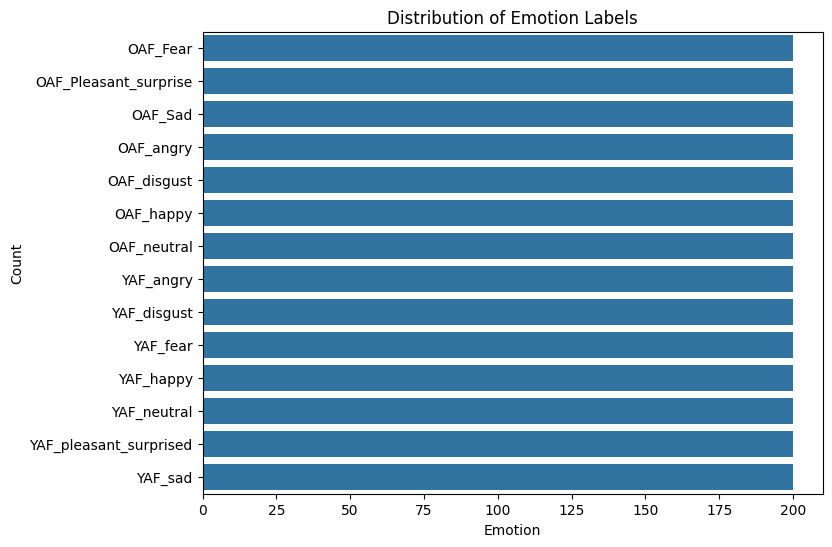

In [27]:

plt.figure(figsize=(8, 6))
sns.countplot(y=labels, order=np.unique(labels))
plt.title('Distribution of Emotion Labels')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

# **splits the dataset into training and testing sets**

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (2240, 40)
Testing Set Size: (560, 40)


# **builds and trains a Neural Network model for emotion classification based on the MFCC features**

In [29]:


# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# Build the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, validation_data=(X_test, y_test_onehot))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0894 - loss: 25.8509 - val_accuracy: 0.0768 - val_loss: 2.6365
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1210 - loss: 2.8048 - val_accuracy: 0.1339 - val_loss: 2.5230
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1353 - loss: 2.5846 - val_accuracy: 0.1393 - val_loss: 2.4542
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1926 - loss: 2.4118 - val_accuracy: 0.4768 - val_loss: 2.1078
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2972 - loss: 2.1122 - val_accuracy: 0.5000 - val_loss: 1.5109
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3629 - loss: 1.8443 - val_accuracy: 0.7232 - val_loss: 1.1819
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4432 - loss: 1.5794 - val_accuracy: 0.7732 - val_loss: 1.0236
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4958 - loss: 1.4026 - val_accuracy: 0.8179 - val_loss: 0.8657
Ep

## **evaluates the performance of the trained model**

In [30]:
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9979 - loss: 0.0035 
Test Accuracy: 99.82%


# **visualize the evaluates of the performance of the trained model**

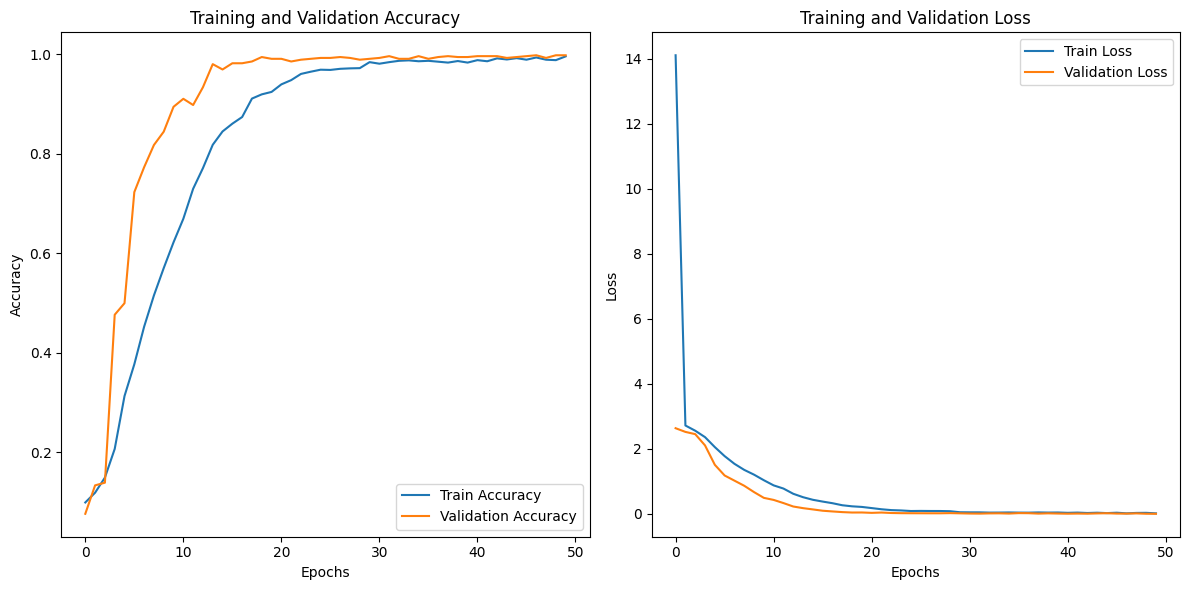

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **predict the emotion of a given audio file based on the trained model**

In [32]:
def predict_emotion(file_path):
    mfccs = extract_features(file_path)
    mfccs = np.expand_dims(mfccs, axis=0)  # Add batch dimension
    prediction = model.predict(mfccs)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    return predicted_label[0]

# Test prediction
sample_file = f"{dataset_path}/OAF_Sad/OAF_back_sad.wav"
predicted_emotion = predict_emotion(sample_file)
print(f"Predicted Emotion: {predicted_emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Emotion: OAF_Sad
